# Cardiovascular Disease Dataset Analysis
## Task 1A - Part 3

## 4.1 Correlation Analysis Between Numerical Attributes

To begin exploring relationships between multiple attributes, a correlation matrix was generated using only the numerical features from the dataset. This analysis aimed to identify:

- Attributes that are linearly related
- Potential clusters or patterns in the data
- Features that may be highly associated with the target attribute (`cardio`)


### Step 1: Data Type Conversion for Correlation Analysis

Prior to computing correlations, all relevant attributes were converted to numeric types. This conversion was necessary as certain values may have been imported as non-numeric strings (e.g., "Yes", "No"), which are incompatible with correlation computations.

The `pd.to_numeric(errors='coerce')` function was used to ensure that any non-numeric entries were safely replaced with `NaN`, so they would be excluded from the correlation calculation.


In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv("32130_AT2_25544685.csv")

# Automatically get all columns except the first column ('id')
numeric_cols = df.columns[1:] 

# Check data types before conversion
print("Columns selected for numeric conversion:")
print(df[numeric_cols].dtypes)

# Convert 'Yes'/'No' to 1/0 for Binary Columns
binary_map = {'Yes': 1, 'No': 0}
df['smoke'] = df['smoke'].map(binary_map)
df['alco'] = df['alco'].map(binary_map)
df['active'] = df['active'].map(binary_map)
df['cardio'] = df['cardio'].map(binary_map)

# Apply numeric conversion
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Check data types after conversion
print("\nData types after conversion:")
print(df[numeric_cols].dtypes)



Columns selected for numeric conversion:
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke           object
alco            object
active          object
cardio          object
dtype: object

Data types after conversion:
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


### Step 2: Generation of the Correlation Heatmap

A correlation matrix was computed using the selected numerical attributes. The Pearson correlation coefficient was used to measure the strength and direction of linear relationships between attribute pairs.

The resulting heatmap was generated to visualise these correlations. It highlights both positive and negative associations, and assists in identifying attribute combinations that may contain meaningful patterns, clusters, or redundancies.


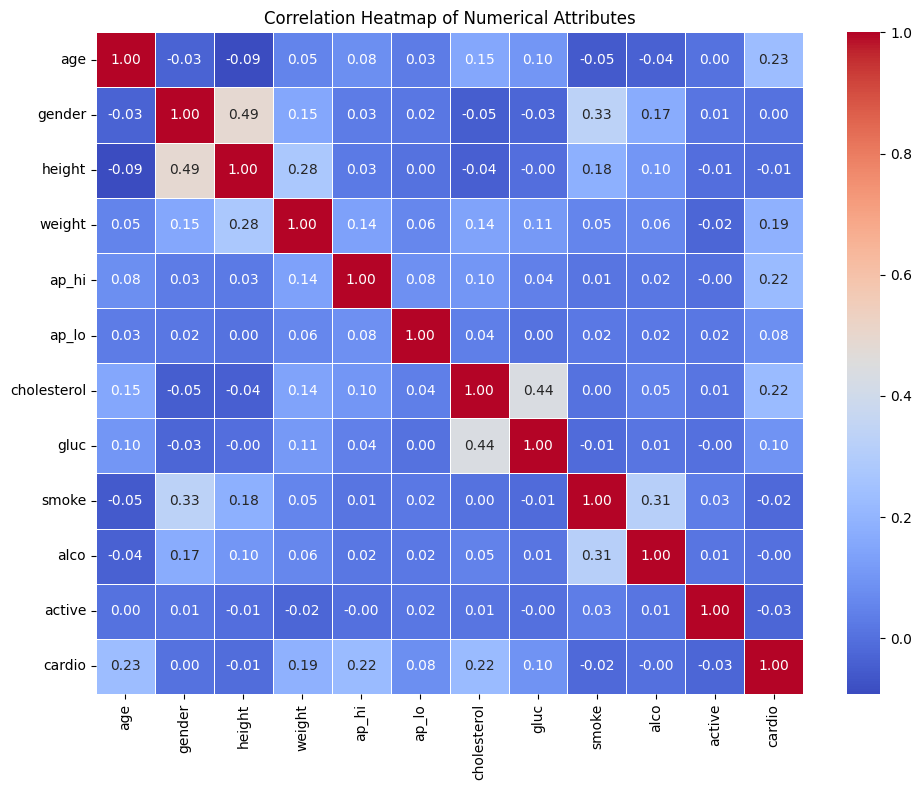

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Attributes')
plt.tight_layout()
plt.show()


### Correlation Analysis Summary (Step 1 – Task 1A Part 3)

A correlation heatmap was created after converting all relevant attributes to numeric. Below is a categorized summary of the most meaningful relationships observed between attributes. Values are sorted from **strongest to weakest** in each group for clarity.

### Strong Positive Correlations (≥ 0.40)
- `gender` and `height` (**0.49**) – Males tend to be taller than females, as expected. Although not medically significant for CVD risk, it supports demographic consistency.
- `cholesterol` and `gluc` (**0.44**) – Individuals with higher cholesterol also tend to have higher glucose levels. This metabolic link is medically relevant and could support early risk detection.

### Moderate Positive Correlations (0.22 – 0.39)
- `gender` and `smoke` (**0.33**) – Smoking is more common among one gender, likely males, suggesting a demographic-lifestyle pattern.
- `smoke` and `alco` (**0.31**) – Smokers are also more likely to consume alcohol, a common co-occurrence in behavioural data.
- `height` and `weight` (**0.28**) – Taller individuals tend to weigh more, indicating body size consistency.
- `age` and `cardio` (**0.23**) – Older individuals have a higher likelihood of cardiovascular disease.
- `ap_hi` and `cardio` (**0.22**) – Higher systolic blood pressure is slightly linked to increased CVD risk.
- `cholesterol` and `cardio` (**0.22**) – Elevated cholesterol is modestly associated with cardiovascular conditions.

### Weak but Relevant Positive Correlations (0.10 – 0.21)
- `weight` and `cardio` (**0.19**) – Heavier individuals show slightly higher CVD rates.
- `smoke` and `height` (**0.18**) – Smokers appear marginally taller, possibly influenced by gender distribution.
- `gender` and `alco` (**0.17**) – Males are more likely to report alcohol intake.
- `age` and `cholesterol` (**0.15**) – Cholesterol levels tend to rise with age.
- `gender` and `weight` (**0.15**) – Males are slightly heavier on average.
- `weight` and `cholesterol` (**0.14**) – Heavier individuals may exhibit higher cholesterol.
- `weight` and `ap_hi` (**0.14**) – Mild increase in systolic pressure with higher weight.
- `ap_hi` and `cholesterol` (**0.10**) – A small association exists between high blood pressure and cholesterol.
- `age` and `gluc` (**0.10**) – Glucose tends to rise slightly with age.
- `gluc` and `cardio` (**0.10**) – High glucose levels may contribute modestly to cardiovascular risk.

### Weak Negative Correlations (–0.01 to –0.09)
- `age` and `height` (**–0.09**) – Older patients are slightly shorter, a known biological trend.
- `age` and `smoke` (**–0.05**) – Smoking appears to decrease with age, possibly due to quitting or health conditions.
- `gender` and `cholesterol` (**–0.05**) – Slight variation in cholesterol between genders.
- `age` and `alco` (**–0.04**) – Alcohol intake slightly decreases with age.
- `height` and `cholesterol` (**–0.04**) – Shorter individuals show marginally higher cholesterol.
- `gender` and `gluc` (**–0.03**) – Minimal difference in glucose levels across genders.
- `active` and `cardio` (**–0.03**) – Slightly lower CVD rates among active individuals, though the correlation is very weak.

---

### Summary Interpretation

From the heatmap, several meaningful patterns were identified:

- The strongest relationships emerged from **demographic pairs** like `gender`–`height`, and **clinical co-factors** such as `cholesterol`–`gluc`.
- Attributes such as `age`, `cholesterol`, `ap_hi`, and `gluc` showed **mild but consistent correlations** with `cardio`, suggesting their value in **predictive modeling or clustering** for cardiovascular risk.
- **Behavioural factors** like `smoke` and `alco` formed internal associations (e.g., with each other and with gender), but displayed **weaker direct correlation with cardiovascular outcomes**.
- **Negative correlations**, though weak (e.g. `age`–`height`, `active`–`cardio`), aligned with known biological or lifestyle trends, supporting data credibility.
- Overall, these observations provide a **strong foundation for multivariate exploration**, including outlier detection and unsupervised learning techniques to uncover deeper patterns.



## Step 3: Outlier Detection Using Boxplots

To identify **potential outliers** and evaluate the spread of values in the dataset, boxplots were created for five key continuous attributes: `ap_lo`, `ap_hi`, `weight`, `height`, and `age`.

Boxplots are useful for visualizing the **median**, **interquartile range**, and detecting **extreme values** that fall outside the whiskers. These outliers may indicate **data entry issues**, rare cases, or unusual measurements.

Each attribute was plotted separately to maintain appropriate y-axis scaling, as their value ranges differ significantly. The analysis below highlights several such anomalies, particularly in blood pressure readings.



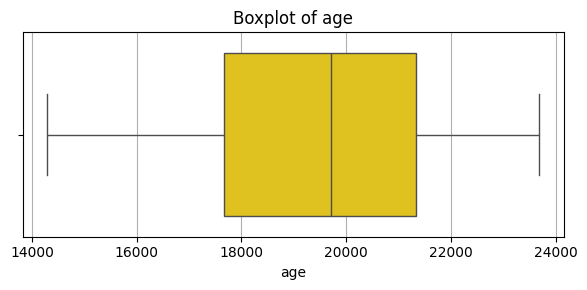

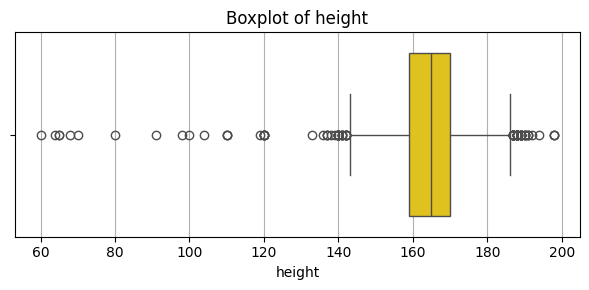

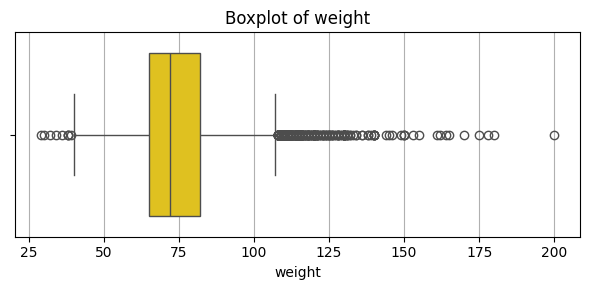

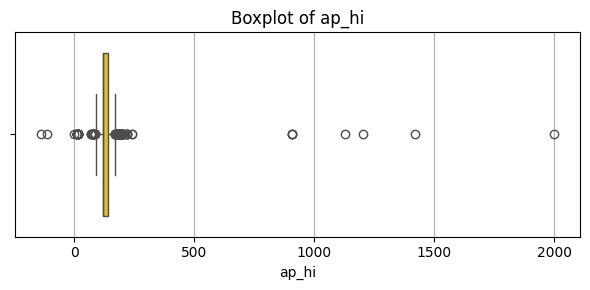

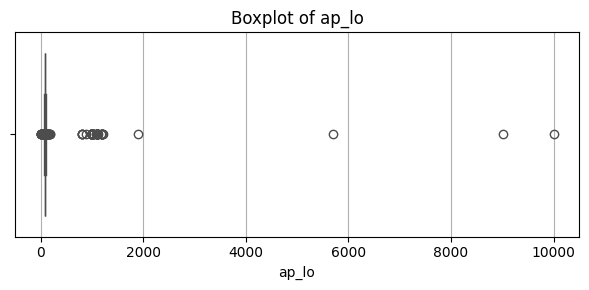

In [29]:
# List of attributes to examine
outlier_attributes = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for attr in outlier_attributes:
    plt.figure(figsize=(6, 3))
    ax = sns.boxplot(x=df[attr], color='gold')
    ax.set_title(f'Boxplot of {attr}')
    ax.set_xlabel(attr)
    ax.grid(True, axis='x')
    plt.tight_layout()
    plt.show()



## Observations:

### `age` (in days)
- **Distribution**: Symmetrical and tightly packed.
- **Observation**: Most values lie between **17,000 and 21,250** days (*approximately **46.6 to 58.2 years***).
- **Outliers**: None detected.
- **Conclusion**: Clean attribute with no extreme or invalid values.

### `height` (in cm)
- **Distribution**: The data appears fairly symmetric with a visible central clustering between approximately **159–170 cm**.
- **Observation**: The interquartile range (IQR) is narrow, indicating that the majority of height values fall within a consistent and expected range.
- **Outliers**: 
  - Outliers are clearly present on both ends of the distribution.
  - **Lower end**: A significant number of values fall below **140 cm**, with some as low as **60 cm**. These may indicate either very short individuals or potential data entry issues.
  - **Upper end**: A few values exceed **190 cm**, though these are fewer in number.
- **Conclusion**: The attribute exhibits a high number of outliers, particularly on the lower end. While some variation is expected, the presence of extreme low values suggests possible inconsistencies or input errors, which should be reviewed during the data cleaning process.


### `weight` (in kg)
- **Distribution**: The attribute shows a slightly right-skewed distribution.
- **Observation**: The interquartile range is concentrated between **65–85 kg**, showing a moderately compact spread for the middle 50% of values. However, most typical values (excluding outliers) are clustered between **40–107 kg**, indicating a wider but still consistent non-outlier range.
- **Outliers**: 
  - A **large number of outliers** are visible on the **higher end**, with values exceeding **107 kg**, up to **200 kg**.
  - A smaller number of **low-end outliers** appear below **40 kg**.
- **Conclusion**: While the central distribution reflects a realistic and medically relevant weight range, the presence of many high-end outliers may indicate a mix of genuinely high-weight individuals (e.g. cases of obesity) and potential anomalies. These should be reviewed carefully to distinguish between valid clinical outliers and possible data entry issues before modeling.



### `ap_hi` (Systolic Blood Pressure, in mmHg)
- **Distribution**: Clearly **right-skewed**, with multiple extreme values pulling the upper end of the scale.
- **Observation**:  
  - The **interquartile range (IQR)** lies between approximately **120–130 mmHg**, representing the middle 50% of the dataset.  
  - The **clustered range (within whiskers)** spans from approximately **110–140 mmHg**, where most typical and medically valid values occur.
- **Outliers**:
  - Numerous **high-end outliers**, with some extreme values exceeding **200 mmHg** and going up to **2000 mmHg**.
  - A few **low-end anomalies**, including values below **zero**, which are **medically invalid** and likely due to input errors.
- **Conclusion**: While most of the data lies within a reasonable range, this attribute contains significant **data quality issues**—particularly implausible high and negative values. **Cleaning or validation** is strongly recommended before further analysis or modeling.


### `ap_lo` (Diastolic Blood Pressure, in mmHg)
- **Distribution**: Strongly **right-skewed**, with several values well beyond typical medical ranges.
- **Observation**:  
  - The **interquartile range (IQR)** lies approximately between **80–90 mmHg**, representing the central 50% of observations.  
  - The **clustered range (within whiskers)** spans from roughly **60–100 mmHg**, capturing the spread of non-outlier, common values.
- **Outliers**:
  - Numerous **extreme high outliers**, including values reaching up to **10,000 mmHg**, which are not physiologically plausible.
  - A few **very low or zero values**, which also warrant review.
- **Conclusion**: The attribute includes substantial anomalies on both ends of the scale. These **outlier values are likely data entry errors** and should be flagged or cleaned during the preprocessing stage.



#### These findings help pinpoint areas that need attention during **data cleaning**, especially for attributes like `ap_hi`, `ap_lo`, and `weight`, where incorrect or extreme entries may distort analysis.


## Step 4: Exploring Attribute Relationships Using Scatter Plots

To explore relationships between **multiple continuous attributes** and understand how they correlate with cardiovascular disease (`cardio`), four **scatter plots** were generated. These help in identifying **clusters**, **potential outliers**, and **interesting value combinations** across pairs of attributes.

Each scatter plot includes a colour-coded separation by the binary target attribute `cardio` (0 = no cardiovascular disease, 1 = has cardiovascular disease). This makes it easier to observe whether certain value combinations are more prevalent among individuals with cardiovascular risk.

### Selected Attribute Pairs:
- `ap_hi` vs `ap_lo` (Systolic vs Diastolic Blood Pressure)
- `age` vs `ap_hi` (Age vs Systolic Blood Pressure)
- `weight` vs `cholesterol`
- `cholesterol` vs `gluc`

These pairs were chosen based on moderate correlations observed in the heatmap and their potential clinical significance.

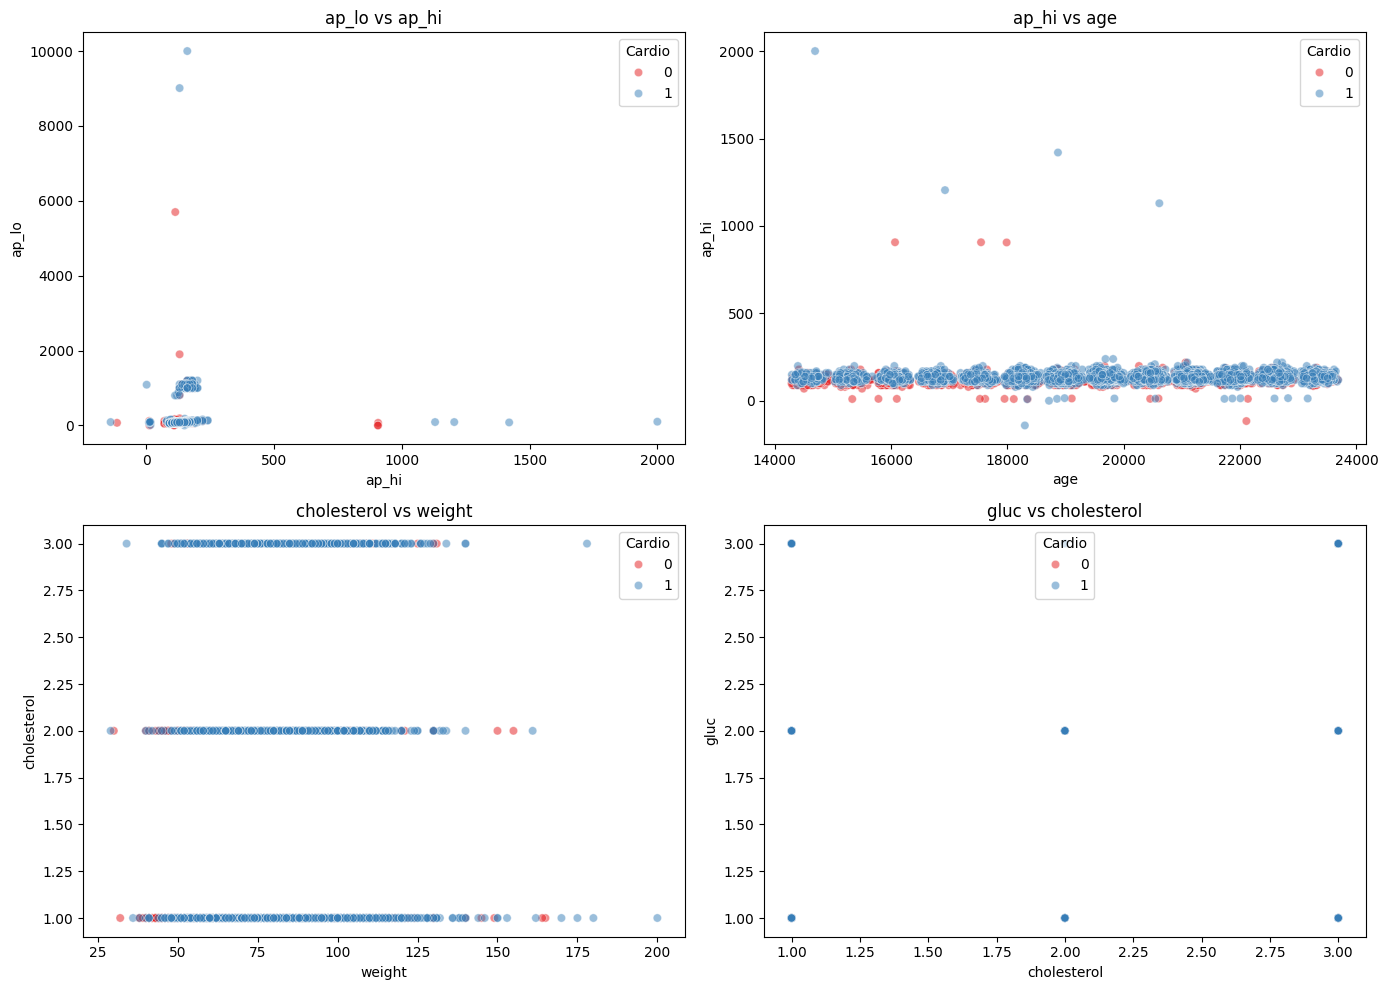

In [32]:
# Define ideal scatter pairs
pairs = [
    ('ap_hi', 'ap_lo'),
    ('age', 'ap_hi'),
    ('weight', 'cholesterol'),
    ('cholesterol', 'gluc')
]

# Create the scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, (x, y) in zip(axes.flatten(), pairs):
    sns.scatterplot(data=df, x=x, y=y, hue='cardio', palette='Set1', alpha=0.5, ax=ax)
    ax.set_title(f"{y} vs {x}")
    ax.legend(title='Cardio', loc='best')

plt.tight_layout()
plt.show()


### Key Observations:
- **`ap_hi` vs `ap_lo`**: A dense cluster appears in the medically plausible blood pressure range, with systolic (`ap_hi`) values around **100–150 mmHg** and diastolic (`ap_lo`) values around **60–100 mmHg**. However, several extreme outliers — including implausibly high readings (e.g., values over **1000 mmHg**) and negative or zero entries — stretch the axes considerably and indicate potential data entry errors. There is no strong visual separation between cardio classes, though **cardio-positive cases** (patients with cardiovascular disease) appear slightly more scattered across the higher ranges, suggesting a mild association with abnormal blood pressure.

- **`ap_hi` vs `age`**: Most systolic values lie between approximately 80–200 mmHg across all ages. Older individuals (~40–60 years converted from days) show more concentration of cardio cases, especially with elevated `ap_hi`, supporting a mild age-related risk trend.

- **`weight` vs `cholesterol`**: Three distinct cholesterol levels are visible. Individuals with higher weight are more likely to have cholesterol levels 2 or 3. Cardio-positive patients are more frequent in these upper bands, aligning with earlier correlation insights.

- **`cholesterol` vs `gluc`**: The scatterplot between `cholesterol` and `gluc` shows three distinct horizontal bands corresponding to the categorical values **1 (Normal)**, **2 (Above Normal)**, and **3 (Well Above Normal)**. Most patients are clustered in the **(1,1)** zone, indicating normal levels of both cholesterol and glucose. Interestingly, all data points belong to **cardio-positive patients**, suggesting a clear trend where individuals with high cholesterol also tend to have high glucose levels. This supports the earlier correlation result and highlights a possible **link between these two conditions** in patients with cardiovascular disease.


These plots reinforce earlier statistical insights and are helpful for identifying **attribute groupings, minor clusters**, and **subtle trends** that could be leveraged in future predictive modelling or classification tasks.


## Step 5: Attribute Distributions by Cardiovascular Outcome (`cardio`)

To explore how key attributes vary between individuals with and without diagnosed cardiovascular disease, boxplots were created for several clinical and lifestyle variables grouped by the `cardio` label.

This visualization helps identify **differences in distribution, medians, and outliers** between the two groups (`cardio = 0` for no disease, `cardio = 1` for disease). Any noticeable shifts or patterns could suggest that the attribute is a **potential risk indicator or predictor** of cardiovascular conditions.

The following variables were selected for comparison:
- `age`
- `ap_hi` (systolic blood pressure)
- `ap_lo` (diastolic blood pressure)
- `weight`
- `cholesterol`
- `gluc`

Each subplot illustrates how the attribute's values differ across the `cardio` classes, supporting deeper analysis of attribute relationships and clustering patterns.


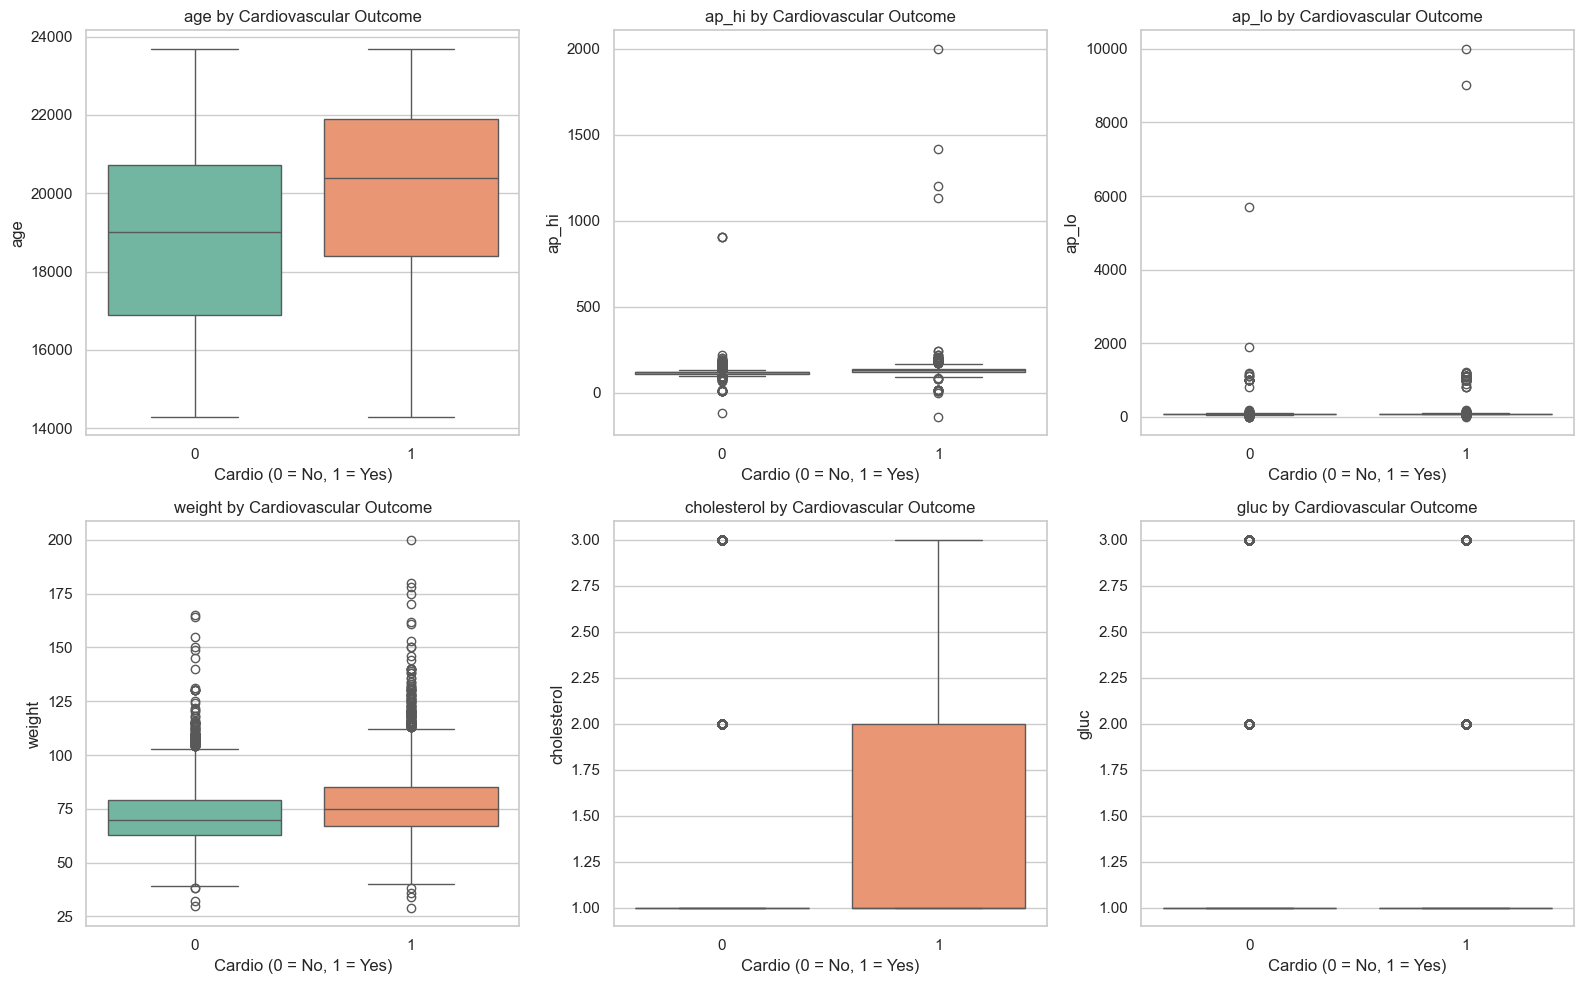

In [34]:
# Set the style
sns.set(style="whitegrid")

# List of attributes to plot
attributes = ['age', 'ap_hi', 'ap_lo', 'weight', 'cholesterol', 'gluc']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Plot each attribute
for idx, var in enumerate(attributes):
    sns.boxplot(x='cardio', y=var, hue='cardio', data=df, palette='Set2', ax=axes[idx], legend=False)
    axes[idx].set_title(f'{var} by Cardiovascular Outcome')
    axes[idx].set_xlabel('Cardio (0 = No, 1 = Yes)')
    axes[idx].set_ylabel(var)

plt.tight_layout()
plt.show()


### Key Observations:

- **`age`**:  
  - Patients with `cardio=1` (those with cardiovascular disease) are generally older than those without.  
  - The median age for `cardio=1` is clearly higher, and the overall distribution is slightly narrower but shifted upward.  
  - This supports earlier findings that **age is a meaningful risk factor**.

- **`ap_hi` (Systolic BP)**:  
  - Higher systolic blood pressure values are more common in the `cardio=1` group.  
  - The median and upper whisker are both elevated, confirming systolic pressure as a **moderate risk indicator**.  
  - Extreme outliers are also more frequent among patients with heart disease.

- **`ap_lo` (Diastolic BP)**:  
  - Similar to `ap_hi`, the `cardio=1` group shows a **slightly elevated central range**.  
  - However, outliers dominate the graph, especially on the higher end, making interpretation harder without cleaning.

- **`weight`**:  
  - A subtle rightward shift in weight distribution is visible for the `cardio=1` group.  
  - While both classes show overlap, **heavier individuals appear marginally more likely to have CVD**.

- **`cholesterol`**:  
  - Individuals with cardiovascular disease are **more likely to have elevated cholesterol levels** (categories 2 and 3).  
  - In contrast, most `cardio=0` cases fall into the normal range (category 1).

- **`gluc` (Glucose)**:  
  - The pattern is similar to cholesterol — patients with heart disease show a **higher frequency of above-normal glucose** levels.  
  - Although values are mostly categorical, a clear separation is seen.

---

### Summary Interpretation

These visual comparisons confirm earlier trends seen in the correlation matrix and scatterplots. Attributes such as **age, blood pressure, weight, cholesterol, and glucose** all show **noticeable shifts in distribution** between `cardio=0` and `cardio=1`. This strengthens their relevance as **predictive features** and highlights areas worth focusing on in future modeling or data cleaning steps.
